In [10]:
import torch
import torch.nn as nn
import re
import pickle
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
symbols = r"([+\-/*^=0123456789.,|'()])"

class NextWord(nn.Module):
    def __init__(self, block_size, vocab_size, emb_dim, hidden_size, activation):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.lin_1 = nn.Linear(block_size * emb_dim, hidden_size[0])
        self.lin_2 = nn.Linear(hidden_size[0], hidden_size[1])
        self.lin_3 = nn.Linear(hidden_size[1], hidden_size[2])
        self.lin_4 = nn.Linear(hidden_size[2], vocab_size)
        self.activation = activation

    def forward(self, x):
        x = self.emb(x)
        x = x.view(x.shape[0], -1)
        x = self.activation(self.lin_1(x))
        x = self.activation(self.lin_2(x))
        x = self.activation(self.lin_3(x))
        x = self.lin_4(x)
        return x


In [2]:
%matplotlib inline

We load all models.

In [11]:

def load_models(path = 'ML_Assignment_3/'):
    with open(f"{path}stoi.pkl", "rb") as f:
        stoi = pickle.load(f)
    with open(f"{path}itos.pkl", "rb") as f:
        itos = pickle.load(f)

    model1 = NextWord(16, len(stoi), 128, [512, 512, 512], nn.LeakyReLU(negative_slope=0.01)).to(device)    
    relu_128_16 = torch.load(f'{path}LeakyReLU(negative_slope=0.01)_EMB128_Context16.pth', map_location = device)    
    relu_128_16 = {k.replace("_orig_mod.", ""): v for k, v in relu_128_16.items()}
    model1.load_state_dict(relu_128_16)
    model2 = NextWord(32, len(stoi), 128, [512, 512, 512], nn.LeakyReLU(negative_slope=0.01)).to(device)
    relu_128_32 = torch.load(f'{path}LeakyReLU(negative_slope=0.01)_EMB128_Context32.pth', map_location = device)
    relu_128_32 = {k.replace("_orig_mod.", ""): v for k, v in relu_128_32.items()}
    model2.load_state_dict(relu_128_32)
    model3 = NextWord(16, len(stoi), 256, [512, 512, 512], nn.LeakyReLU(negative_slope=0.01)).to(device)
    relu_256_16 = torch.load(f'{path}LeakyReLU(negative_slope=0.01)_EMB256_Context16.pth', map_location = device)
    relu_256_16 = {k.replace("_orig_mod.", ""): v for k, v in relu_256_16.items()}
    model3.load_state_dict(relu_256_16)
    model4 = NextWord(32, len(stoi), 256, [512, 512, 512], nn.LeakyReLU(negative_slope=0.01)).to(device)
    relu_256_32 = torch.load(f'{path}LeakyReLU(negative_slope=0.01)_EMB256_Context32.pth', map_location = device)
    relu_256_32 = {k.replace("_orig_mod.", ""): v for k, v in relu_256_32.items()}
    model4.load_state_dict(relu_256_32)
    model5 = NextWord(16, len(stoi), 128, [512, 512, 512], nn.Tanh()).to(device)
    tanh_128_16 = torch.load(f'{path}Tanh()_EMB128_Context16.pth',map_location = device)
    tanh_128_16 = {k.replace("_orig_mod.", ""): v for k, v in tanh_128_16.items()}
    model5.load_state_dict(tanh_128_16)
    model6 = NextWord(32, len(stoi), 128, [512, 512, 512], nn.Tanh()).to(device)
    tanh_128_32 = torch.load(f'{path}Tanh()_EMB128_Context32.pth',map_location = device)
    tanh_128_32 = {k.replace("_orig_mod.", ""): v for k, v in tanh_128_32.items()}
    model6.load_state_dict(tanh_128_32)
    model7 = NextWord(16, len(stoi), 256, [512, 512, 512], nn.Tanh()).to(device)
    tanh_256_16 = torch.load(f'{path}Tanh()_EMB256_Context16.pth',map_location = device)
    tanh_256_16 = {k.replace("_orig_mod.", ""): v for k, v in tanh_256_16.items()}
    model7.load_state_dict(tanh_256_16)
    model8 = NextWord(32, len(stoi), 256, [512, 512, 512], nn.Tanh()).to(device)
    tanh_256_32 = torch.load(f'{path}Tanh()_EMB256_Context32.pth',map_location = device)
    tanh_256_32 = {k.replace("_orig_mod.", ""): v for k, v in tanh_256_32.items()}
    model8.load_state_dict(tanh_256_32)

    
    return stoi, itos, {
        'relu_128_16': model1,
        'relu_128_32': model2,
        'relu_256_16': model3,
        'relu_256_32': model4,
        'tanh_128_16': model5,
        'tanh_128_32': model6,
        'tanh_256_16': model7,
        'tanh_256_32': model8

    }

In [29]:
def get_embeddings(model):
    emb = model.emb.weight.data.cpu().numpy()
    return emb

def plot_tsne_embeddings(name,emb, itos, path='ML_Assignment_3/', font=5, size=10, dpi=100):
    tsne = TSNE(n_components=2, random_state=42)
    emb_tsne = tsne.fit_transform(emb)
    plt.figure(figsize=(size, size))
    plt.scatter(emb_tsne[:, 0], emb_tsne[:, 1])
    for i, txt in enumerate(itos):
        plt.text(emb_tsne[i, 0], emb_tsne[i, 1], itos[txt], fontsize=font, ha='center', va='center')
        #plt.annotate(itos[txt], (emb_tsne[i, 0], emb_tsne[i, 1]))
    plt.title(f'{name} embeddings')
    plt.savefig(f'{path}tsne_images/{name}_visulations.svg', dpi = dpi, format = 'svg')
    plt.show()


In [12]:
stoi, itos, models = load_models(path="")

C:\Users\Rajeev Wankar\AppData\Local\Temp\ipykernel_24976\2798432200.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  relu_128_16 = torch.load(f'{path}LeakyReLU(negative_

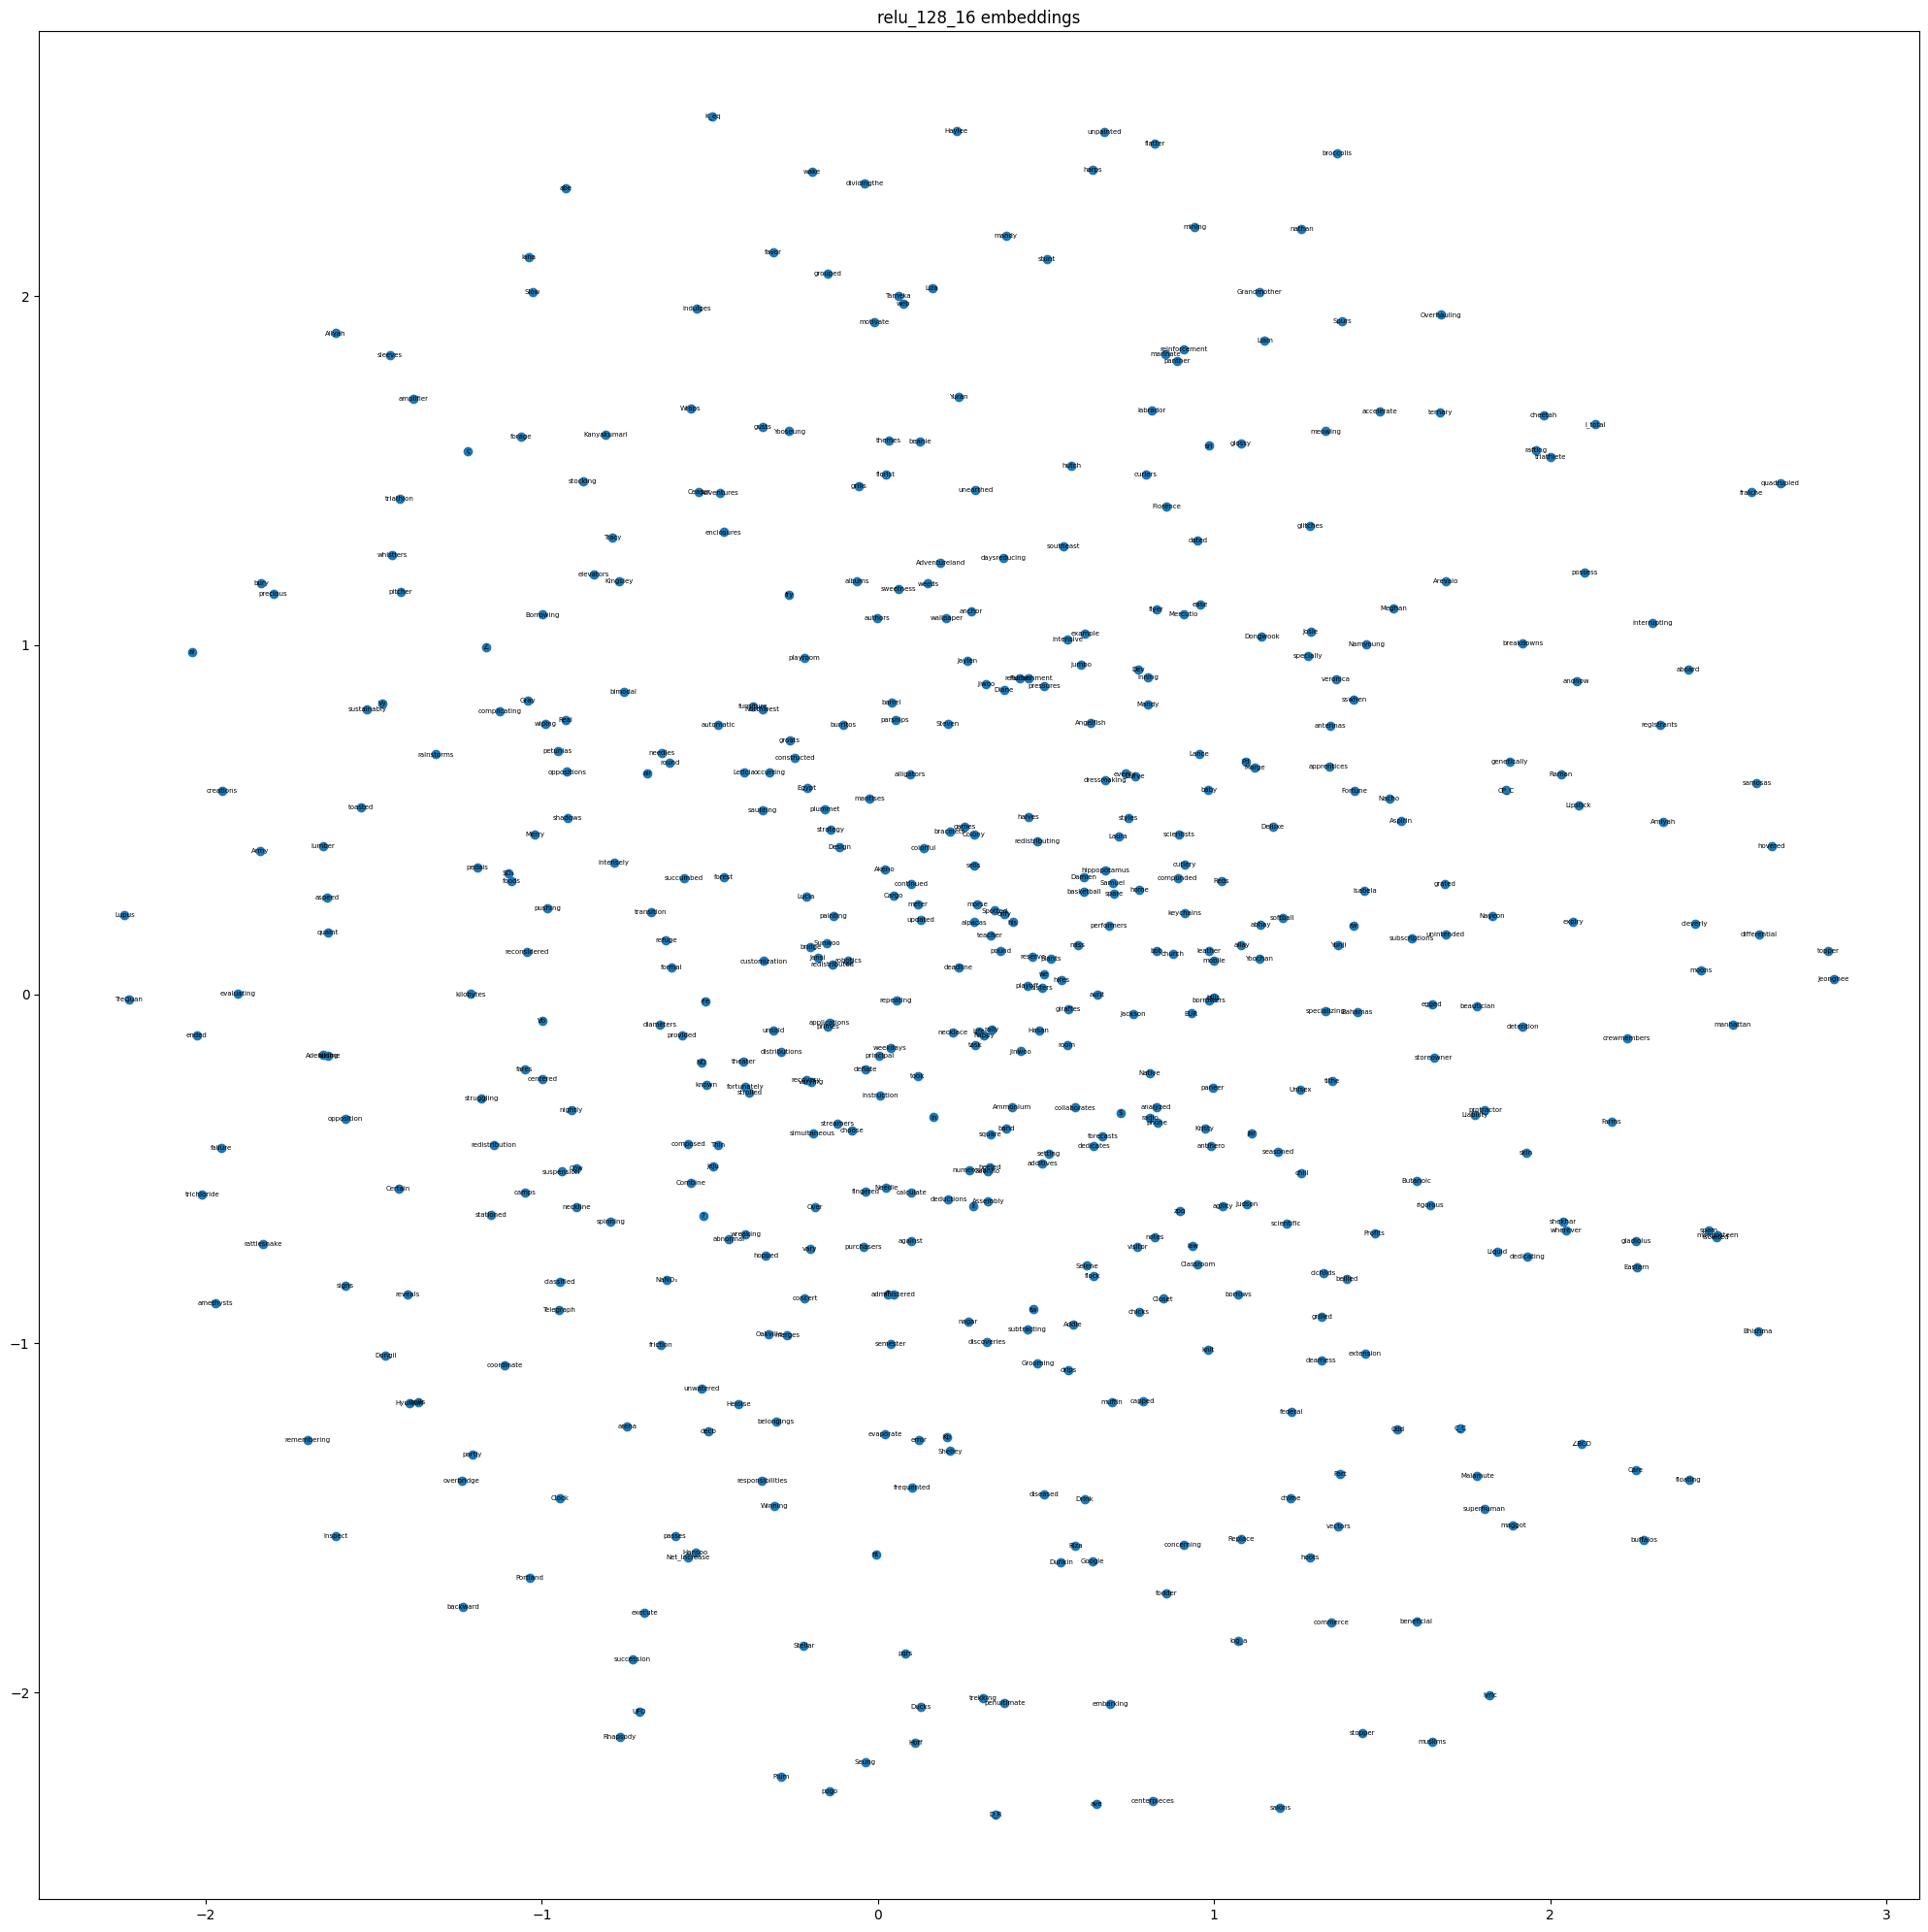

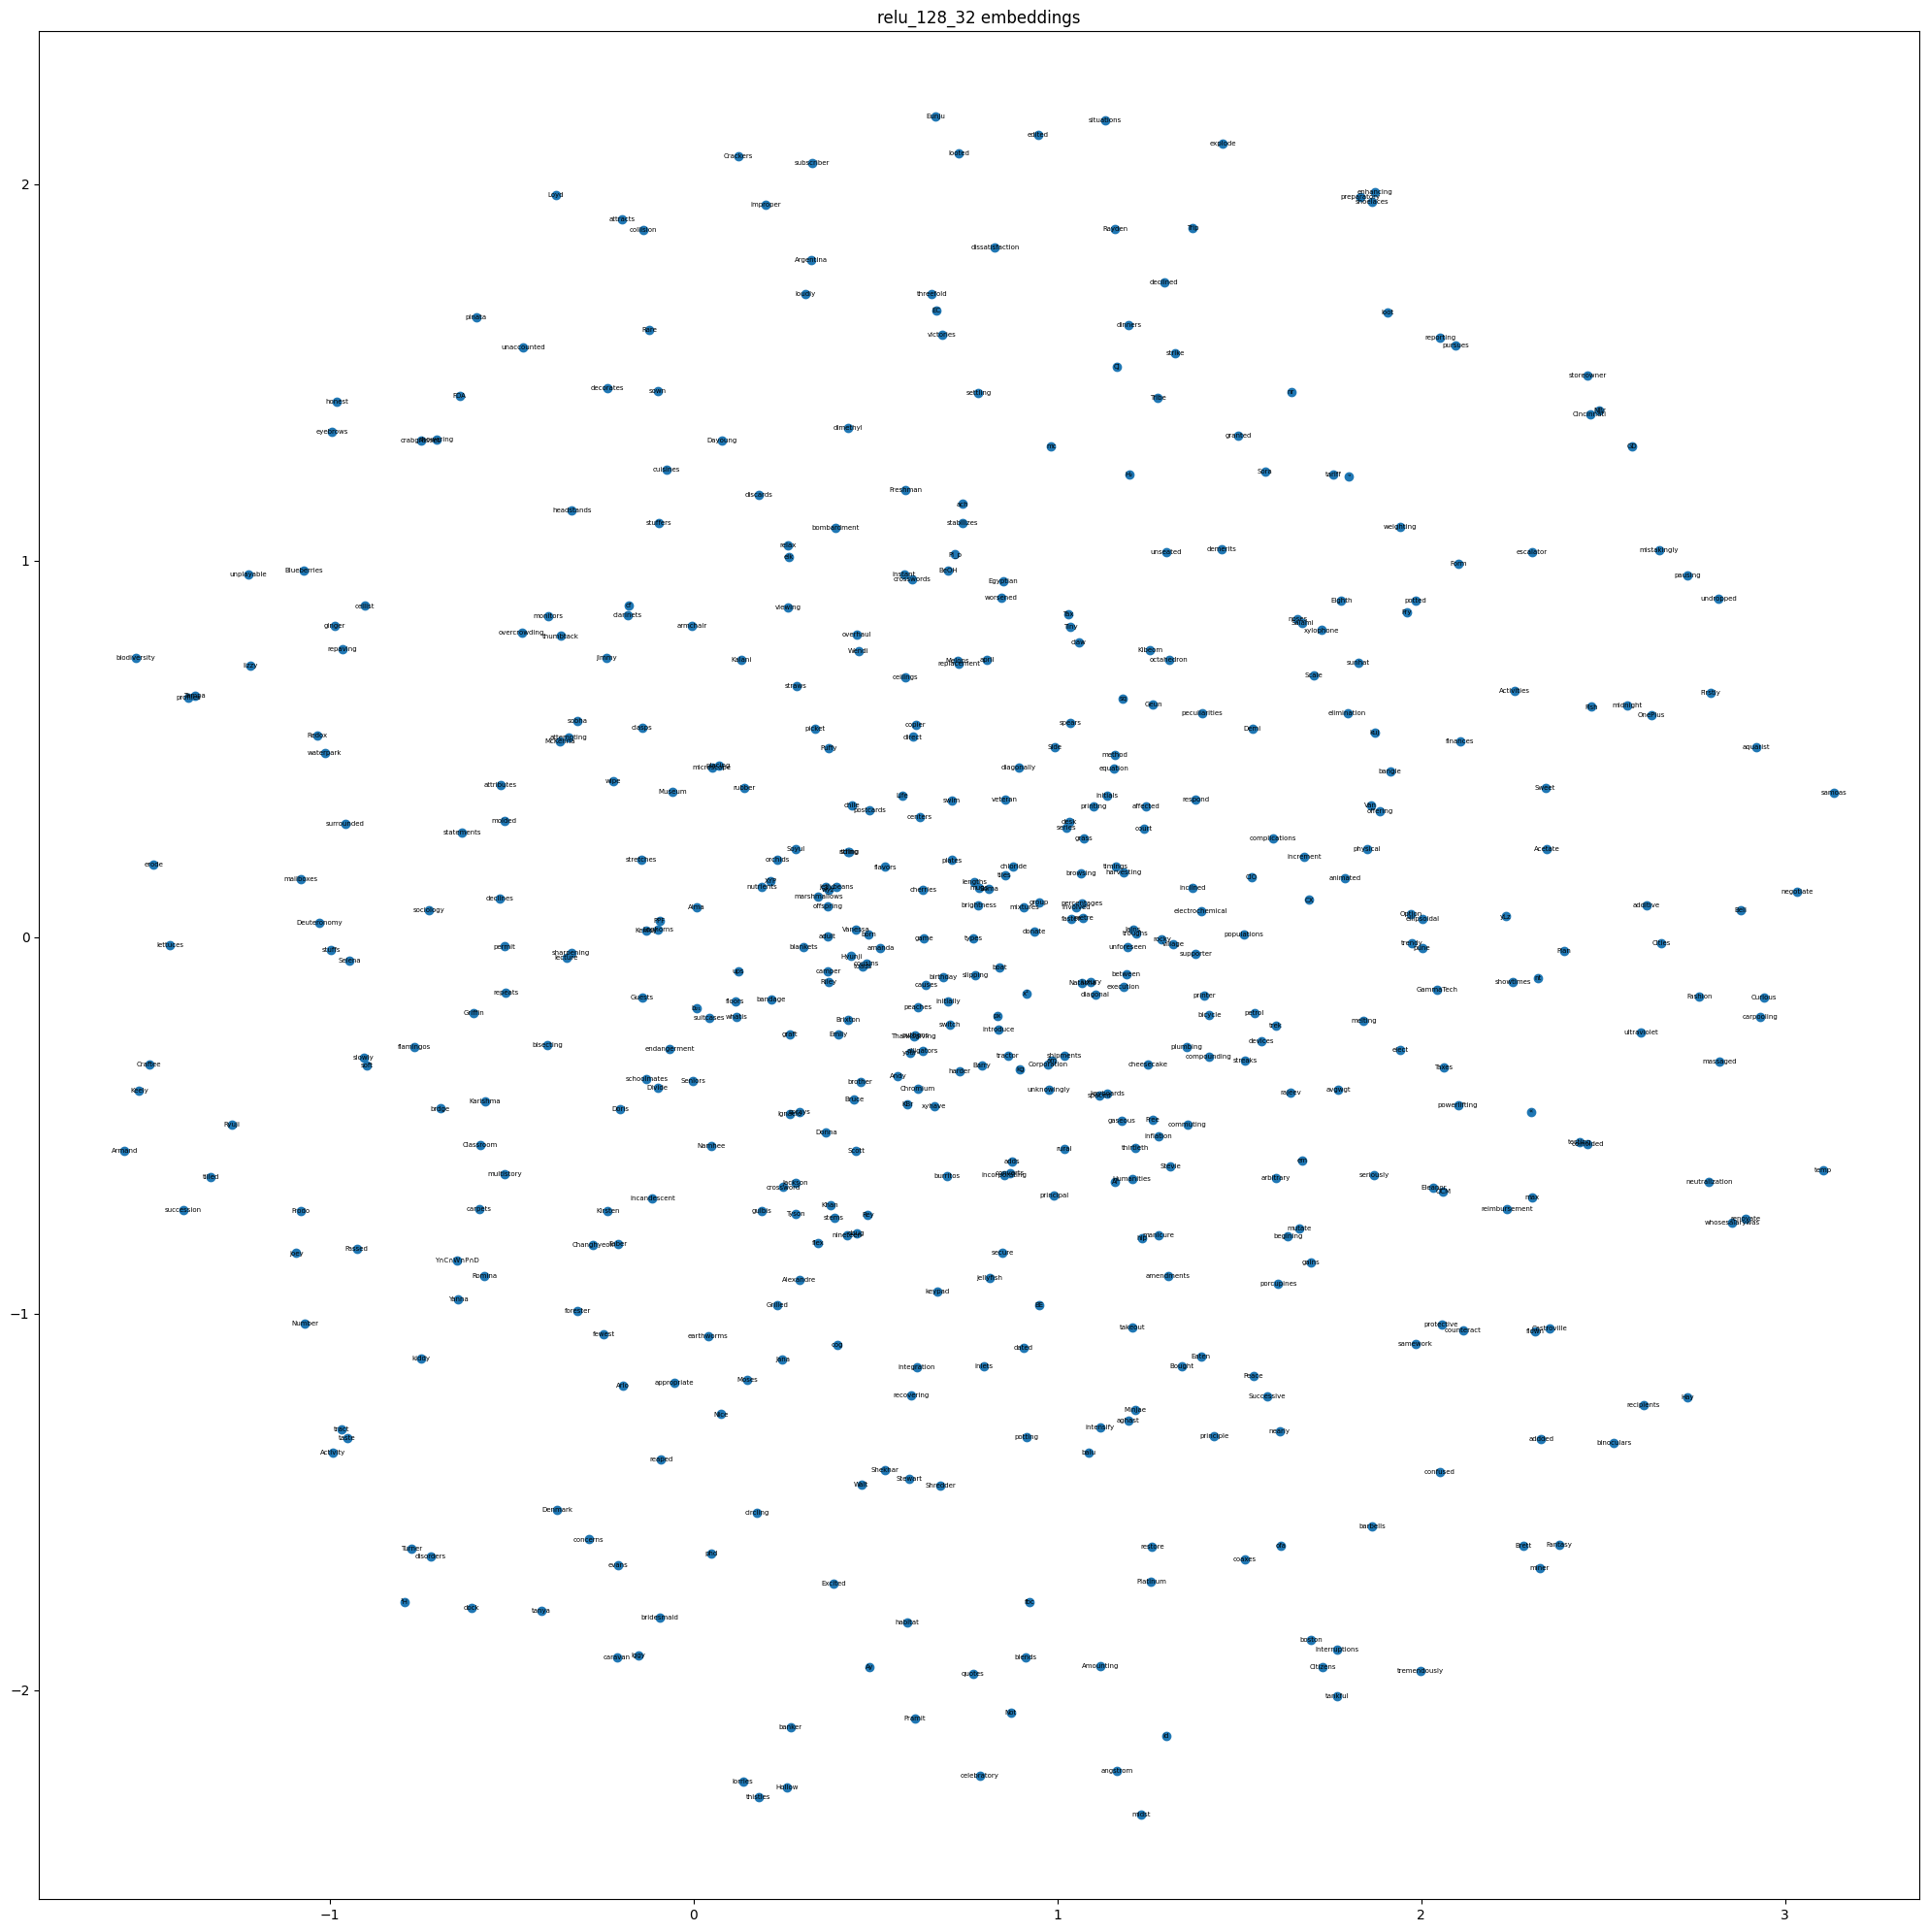

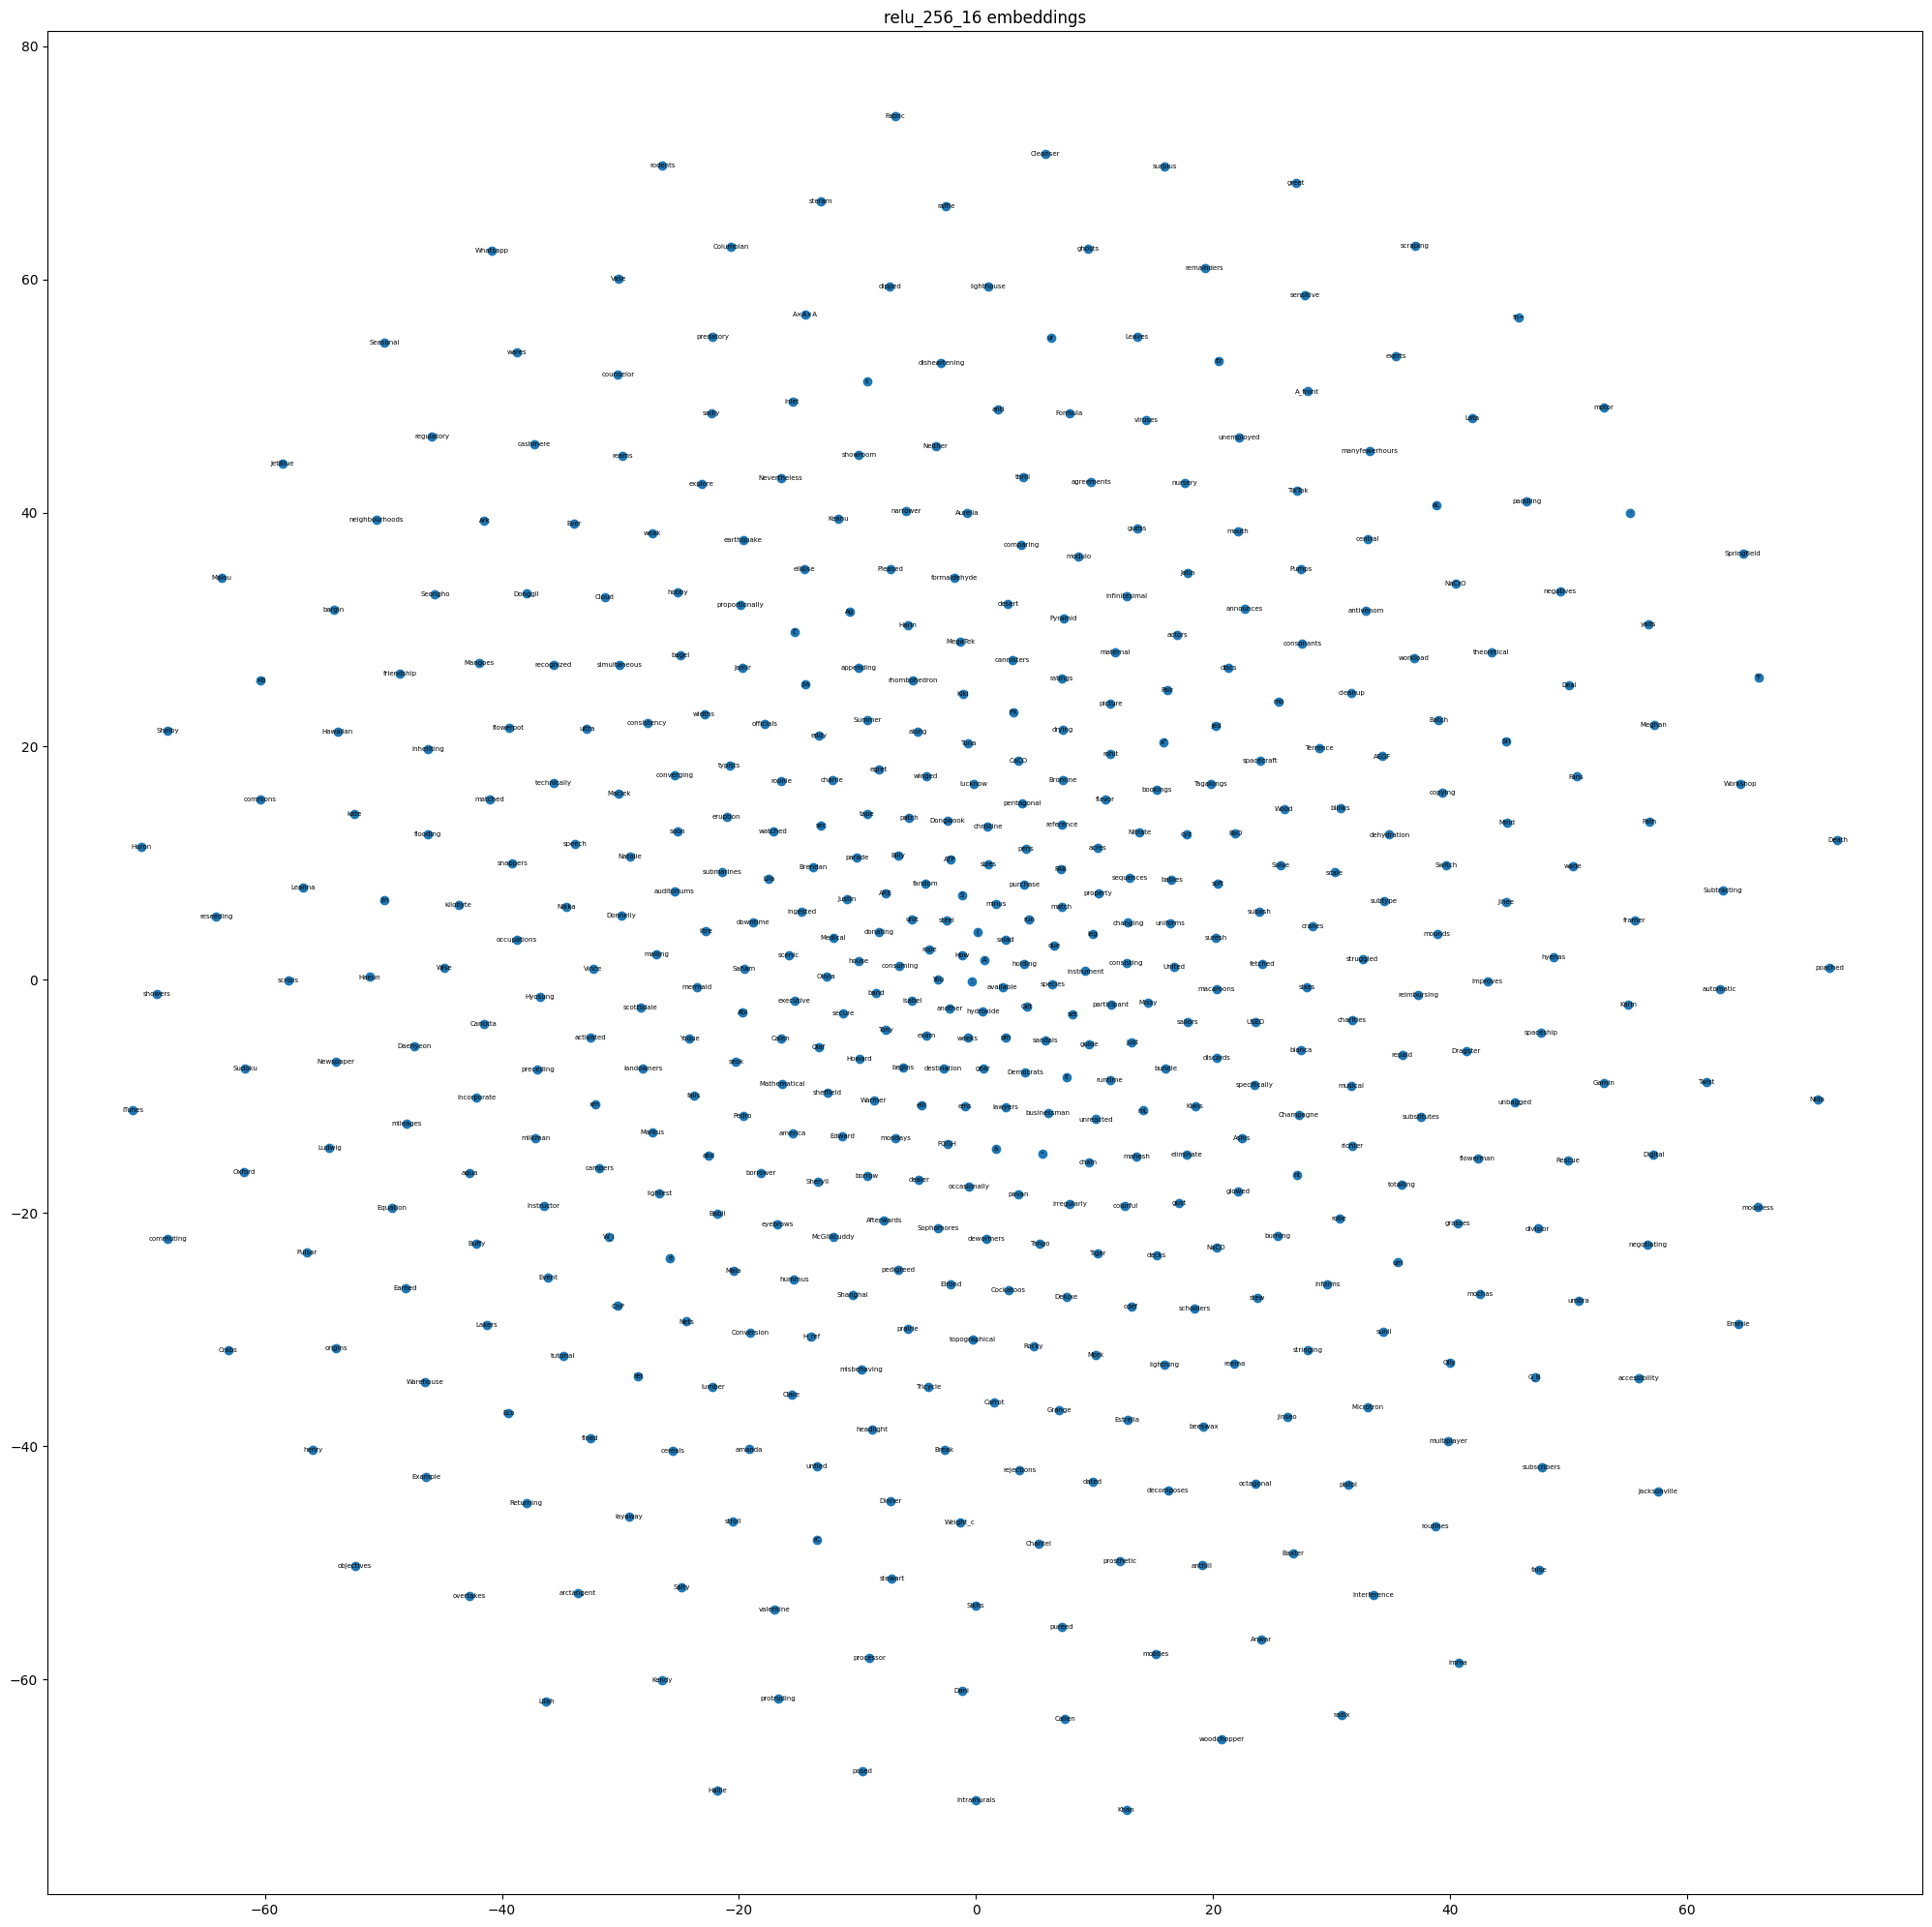

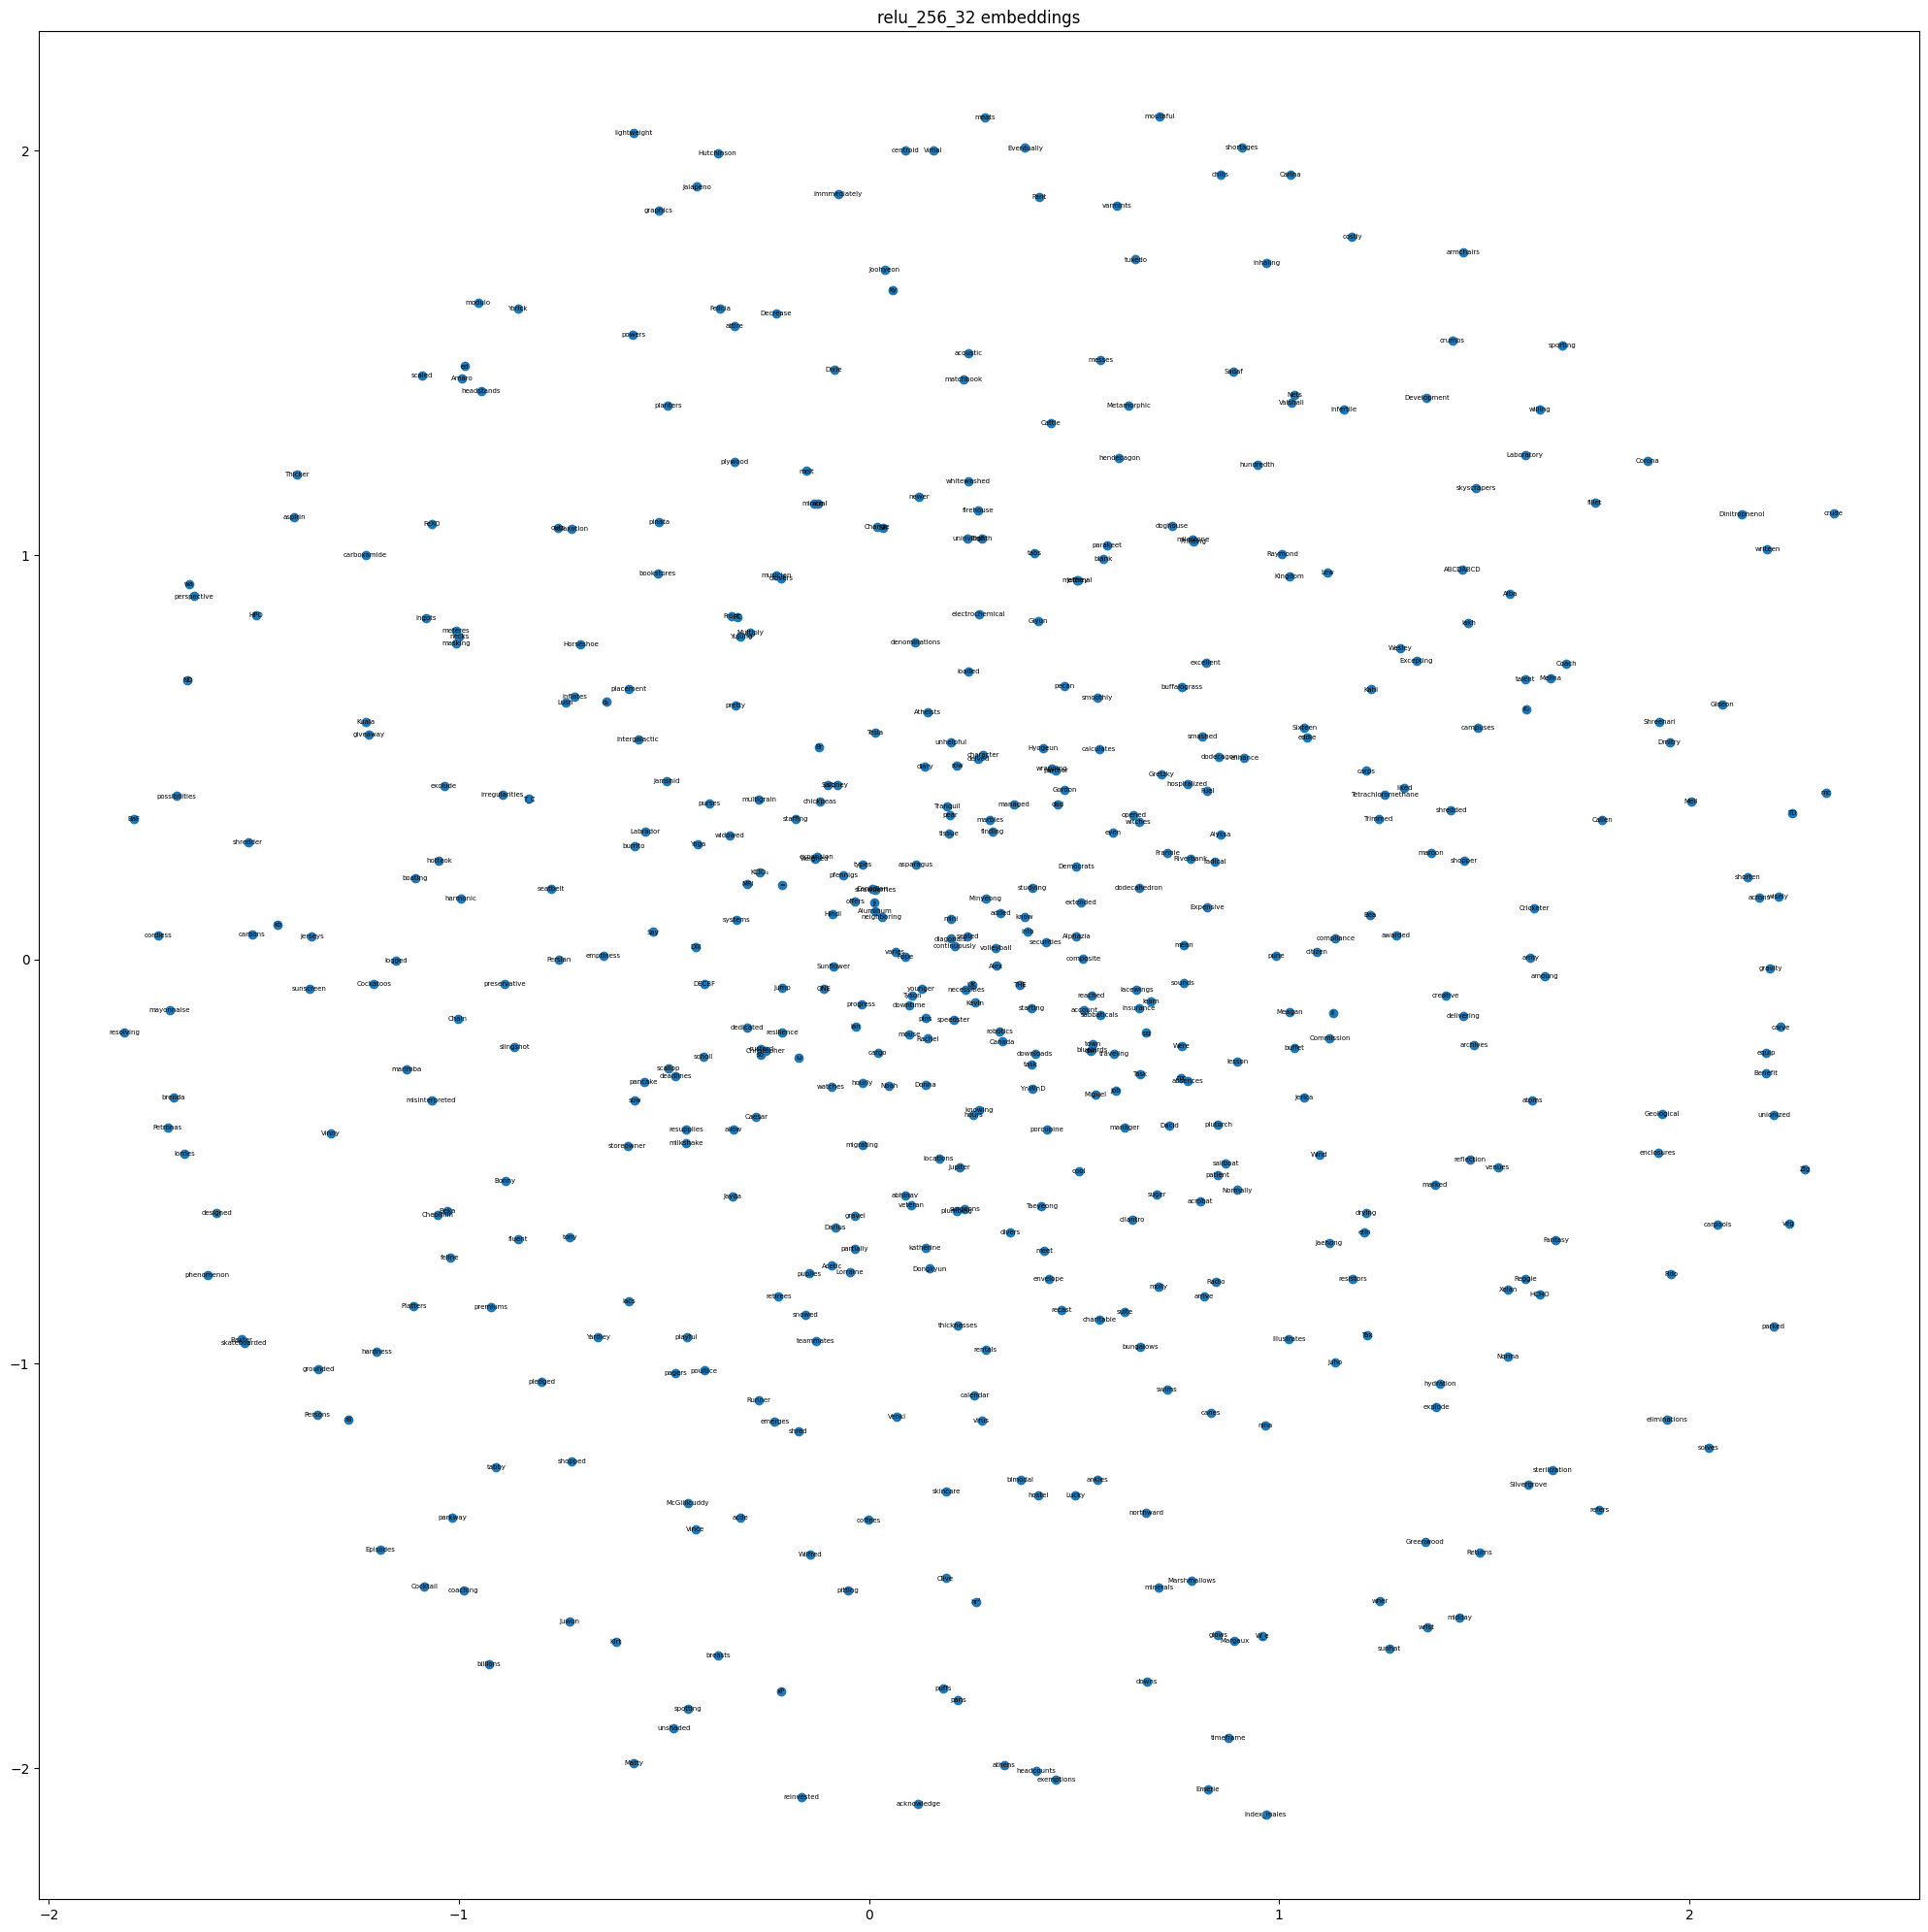

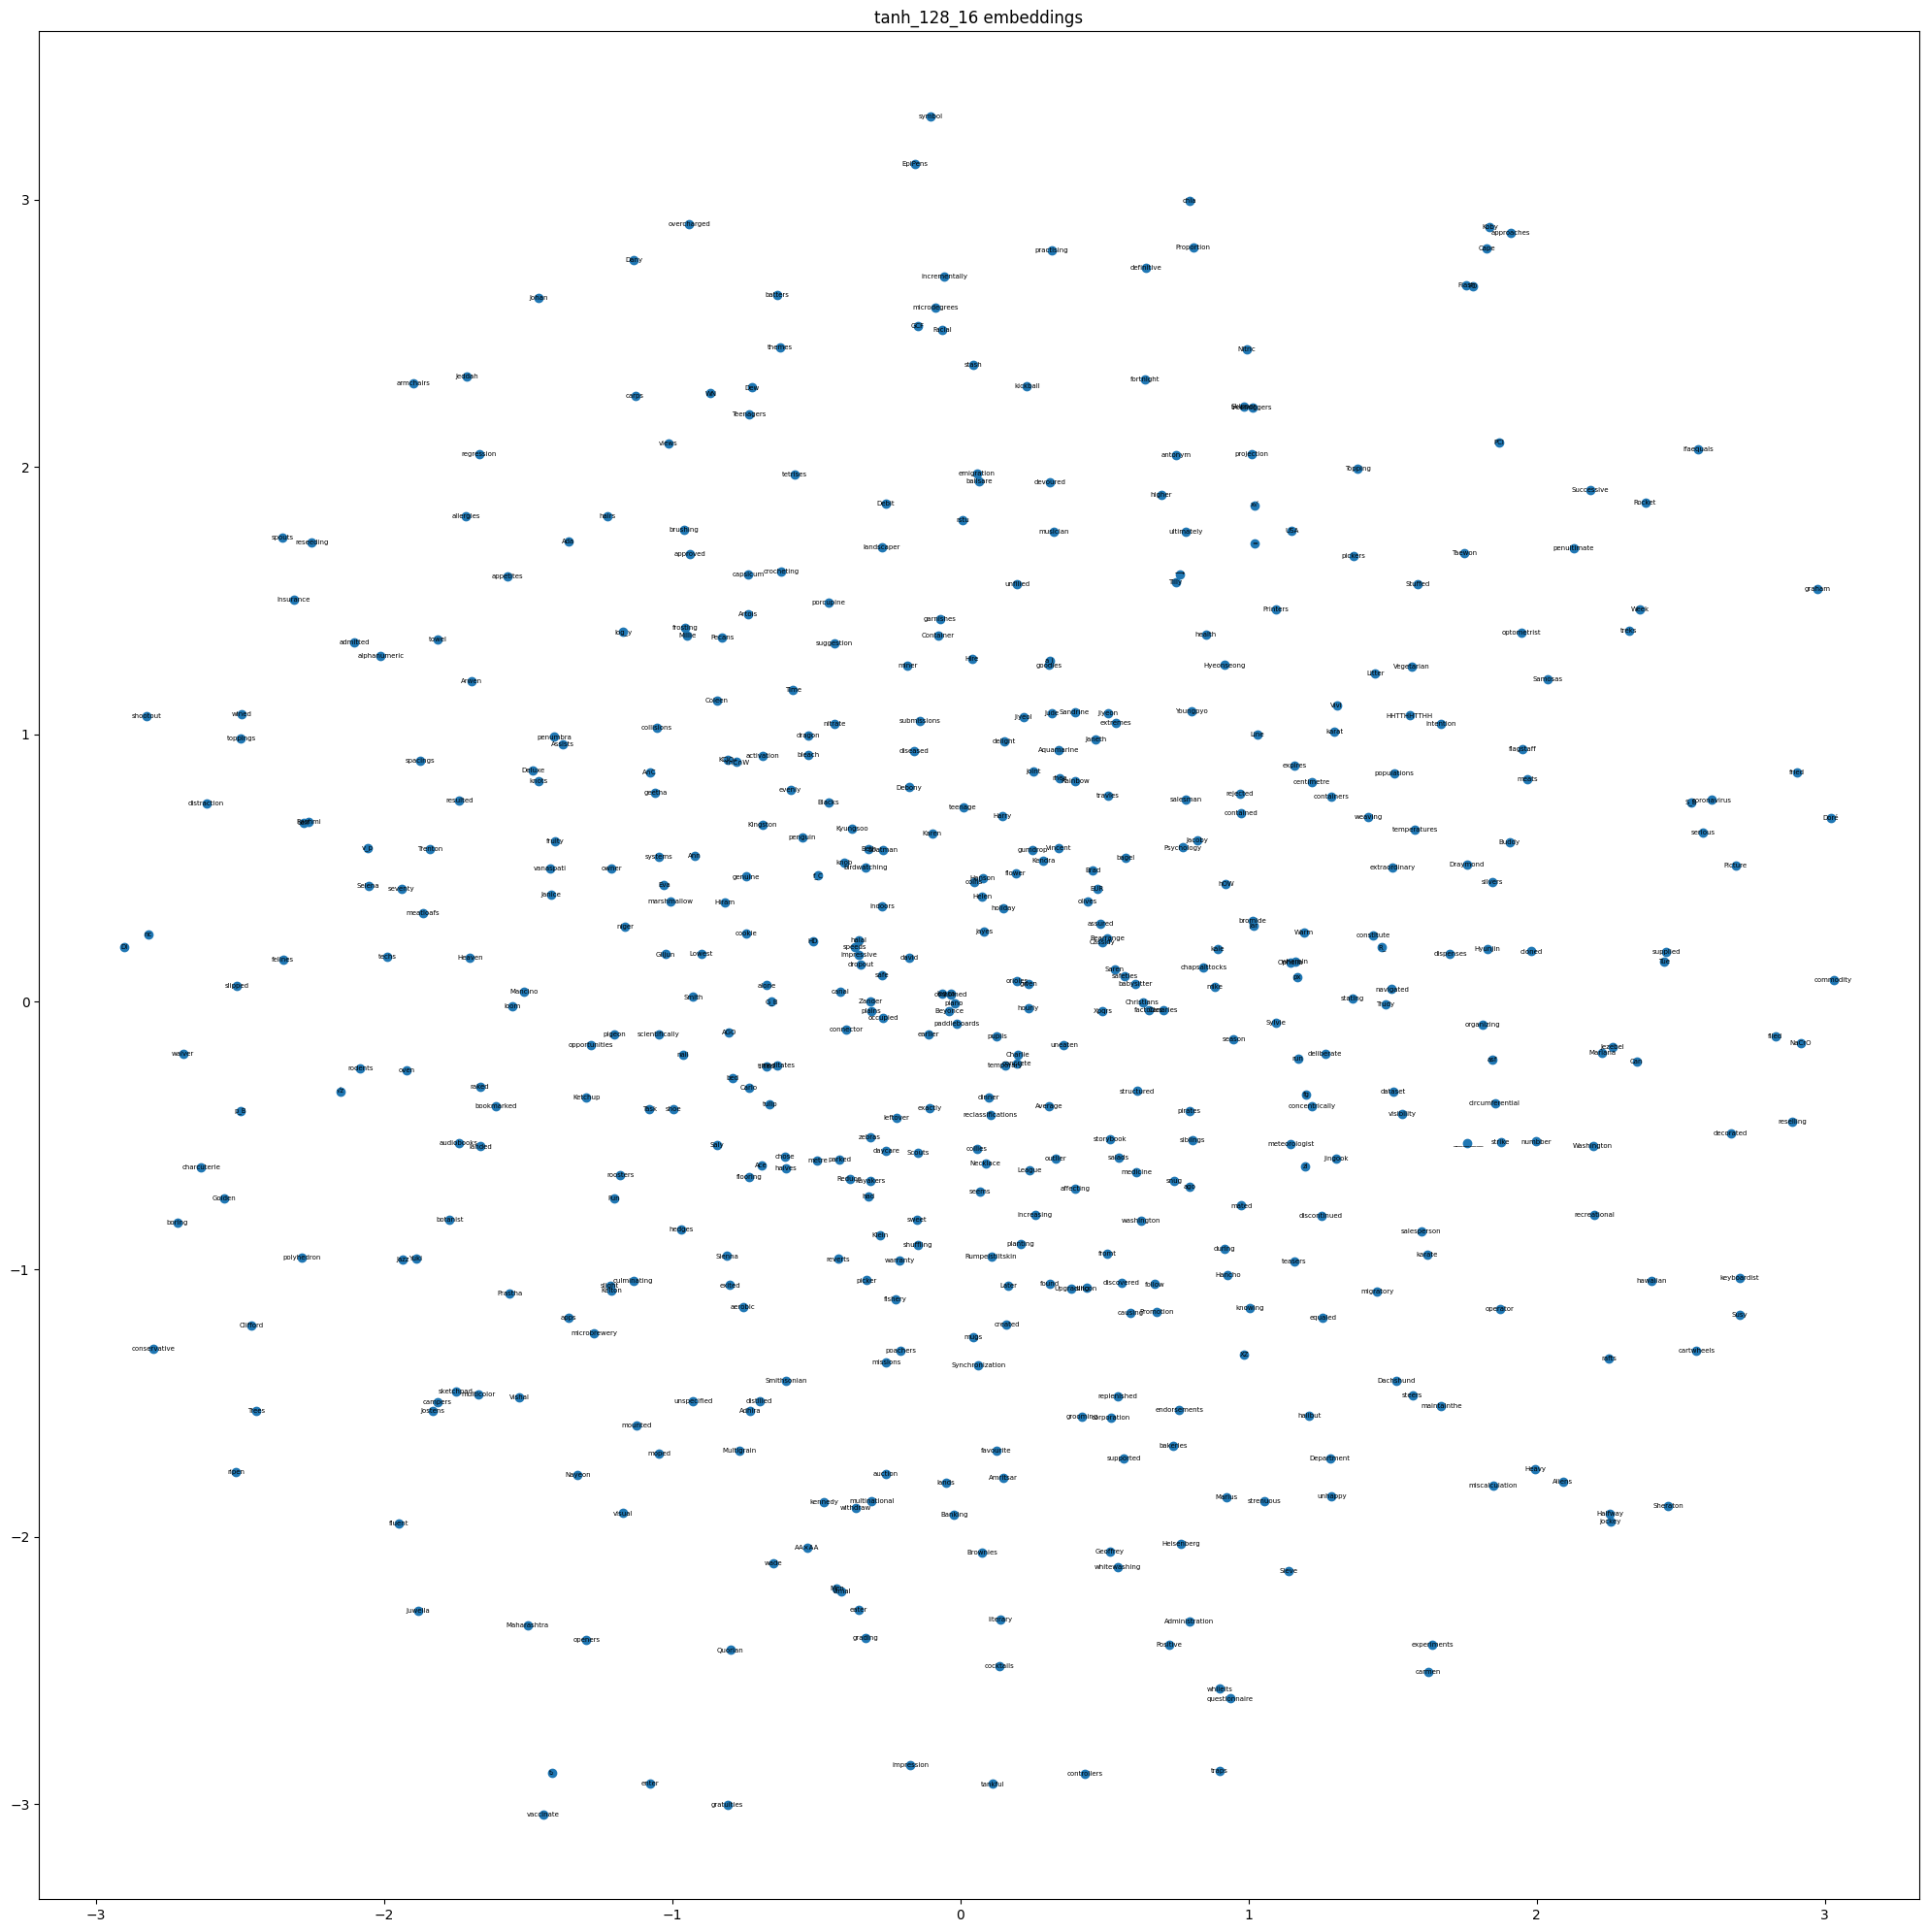

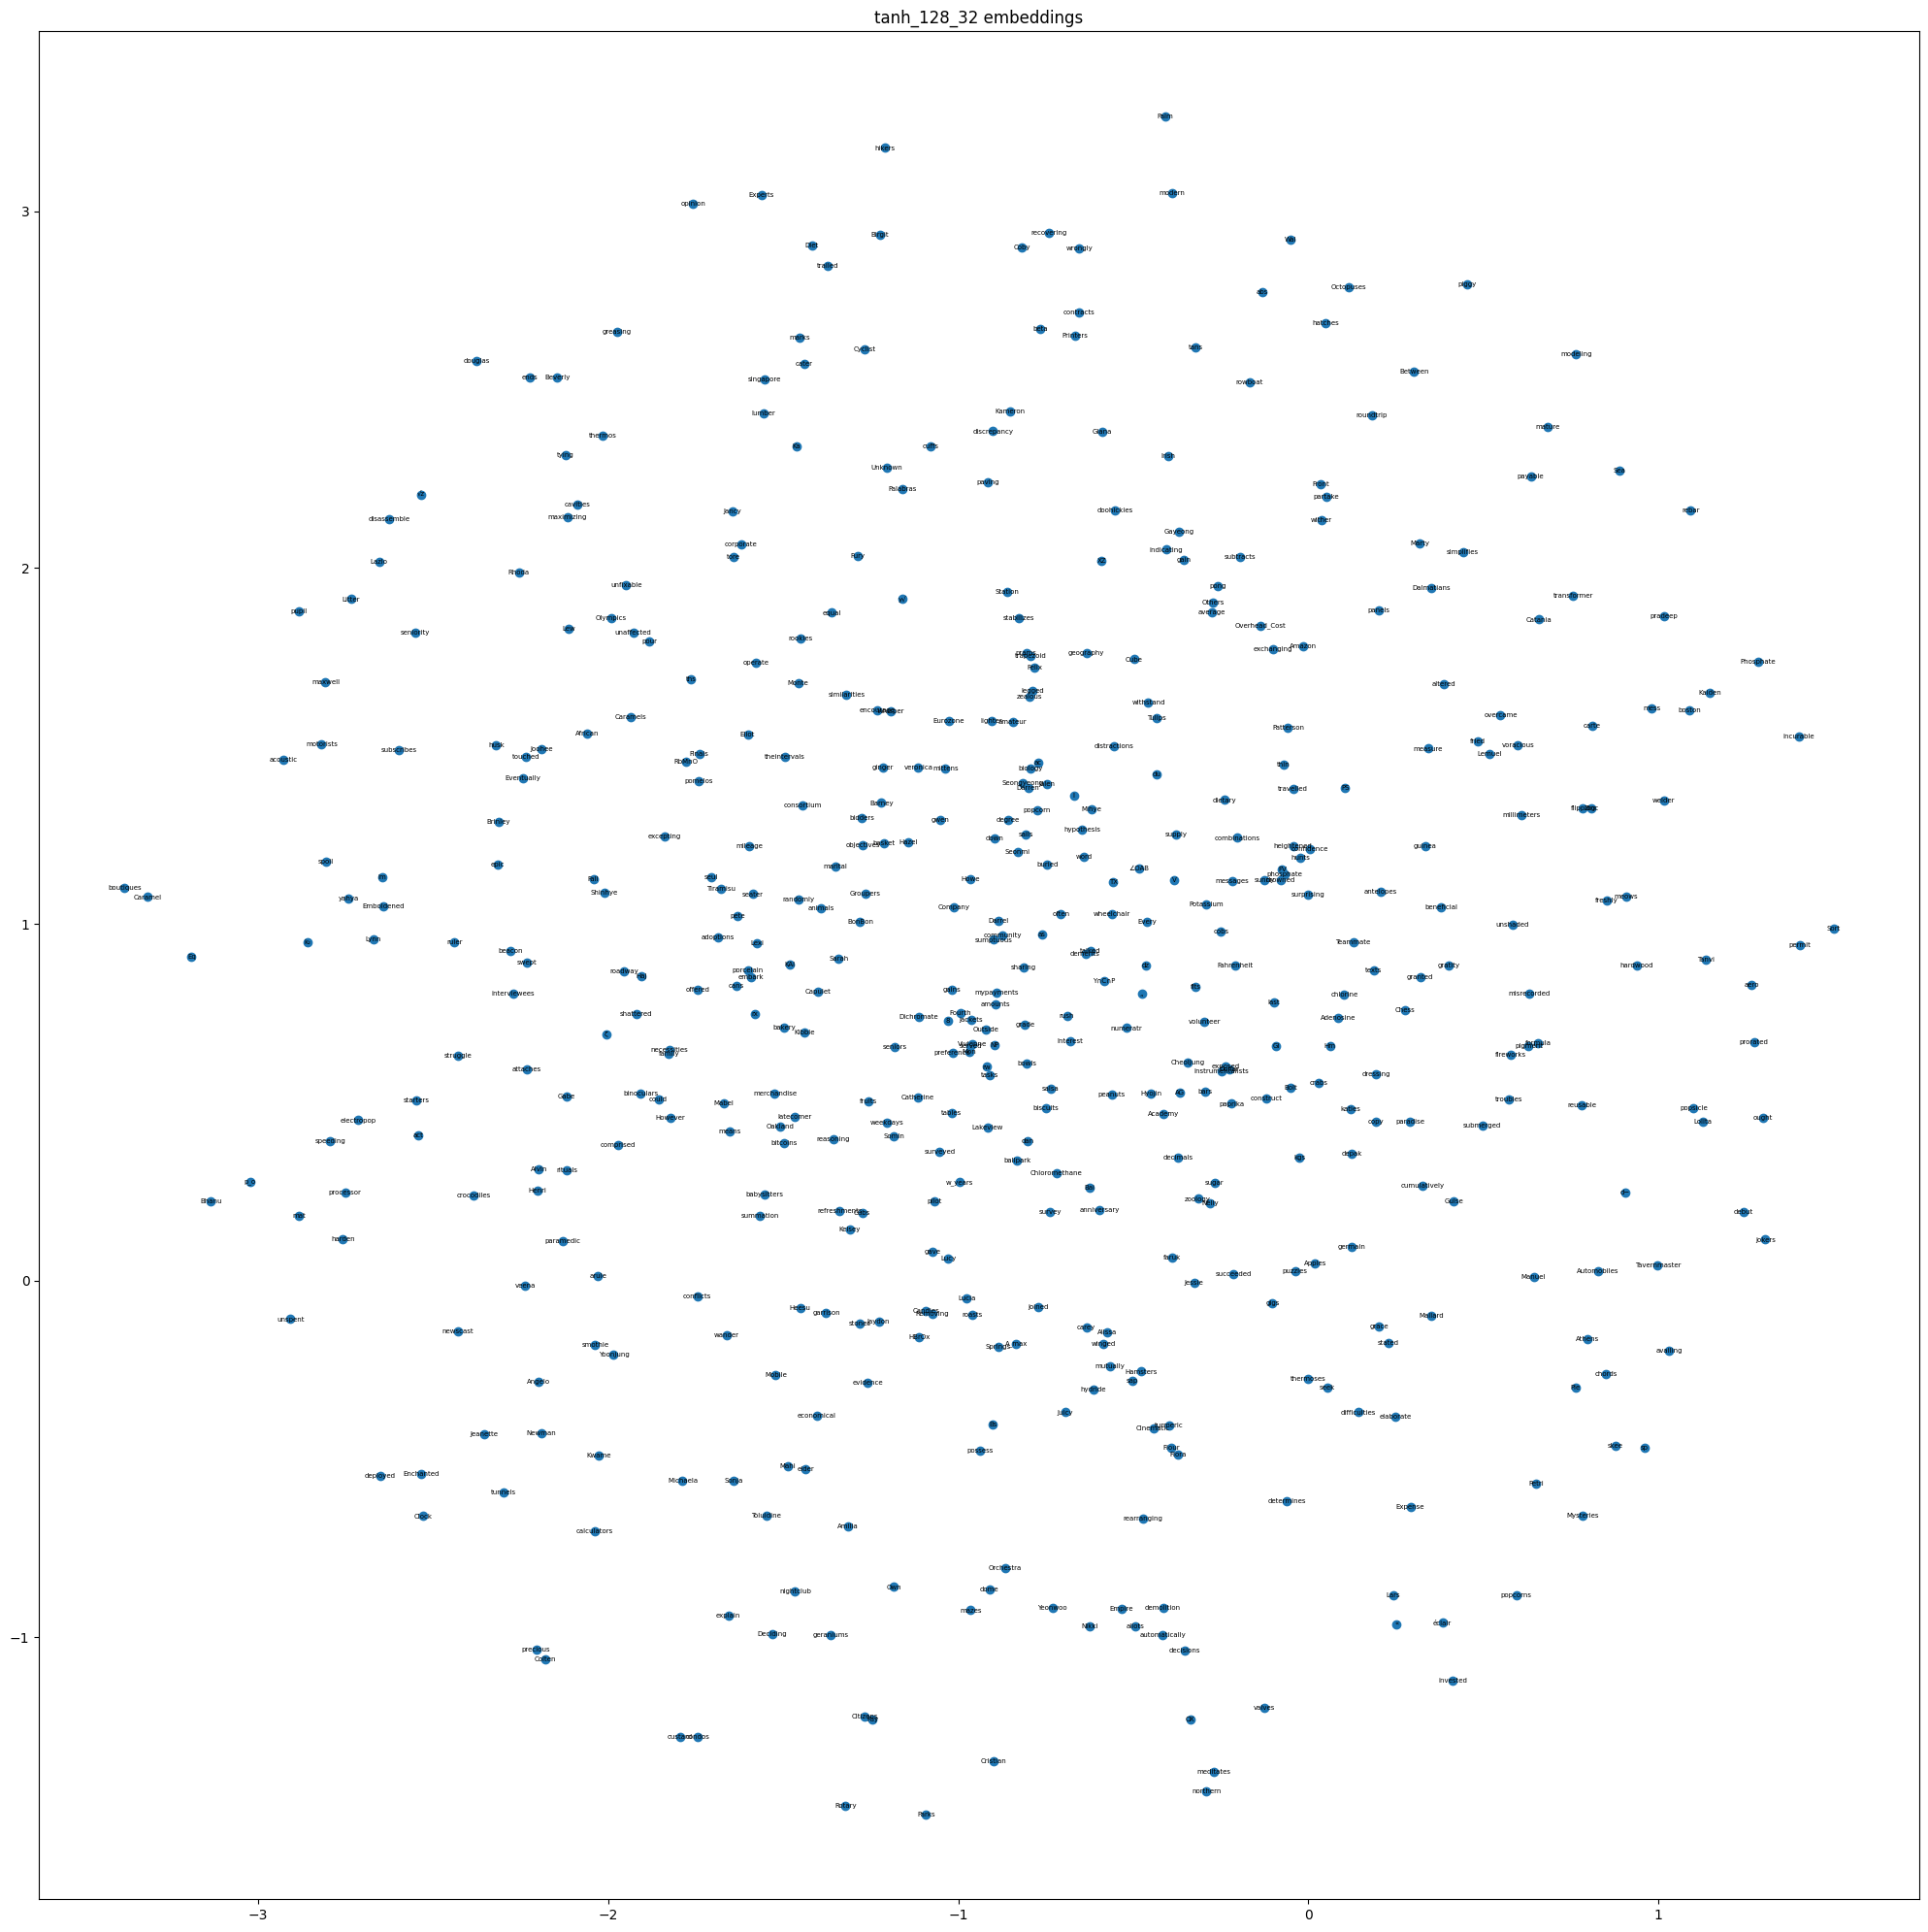

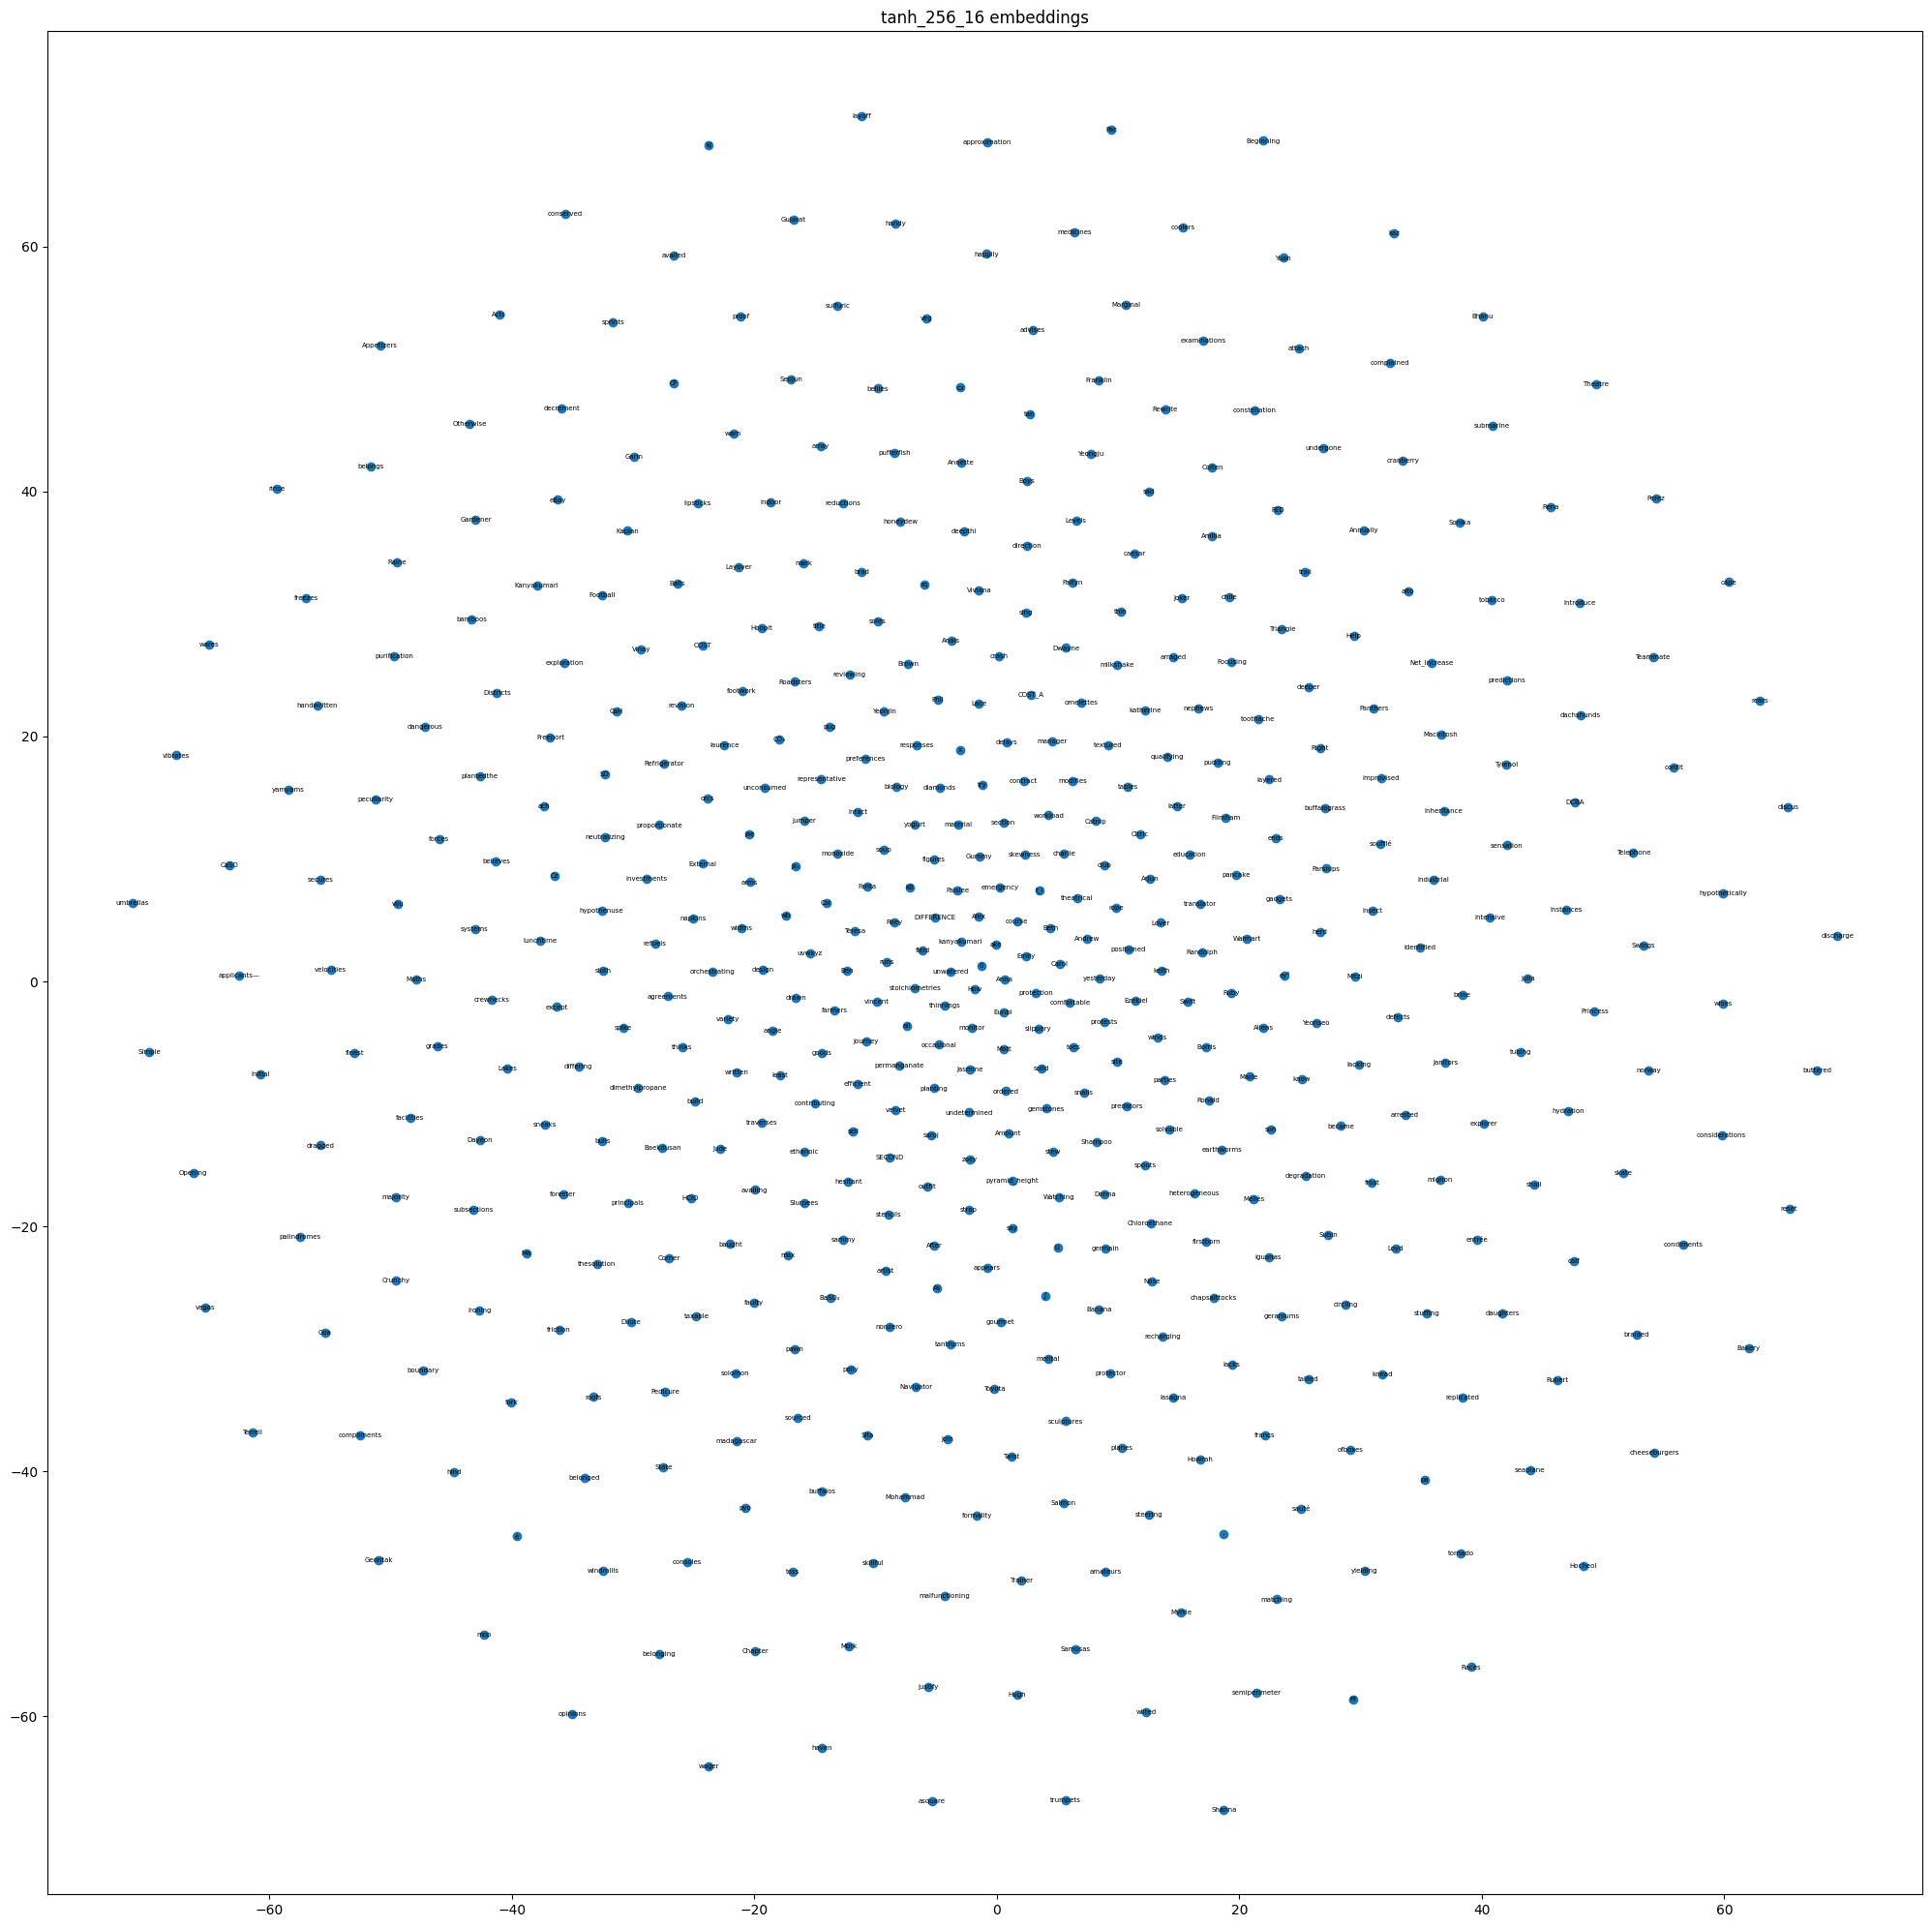

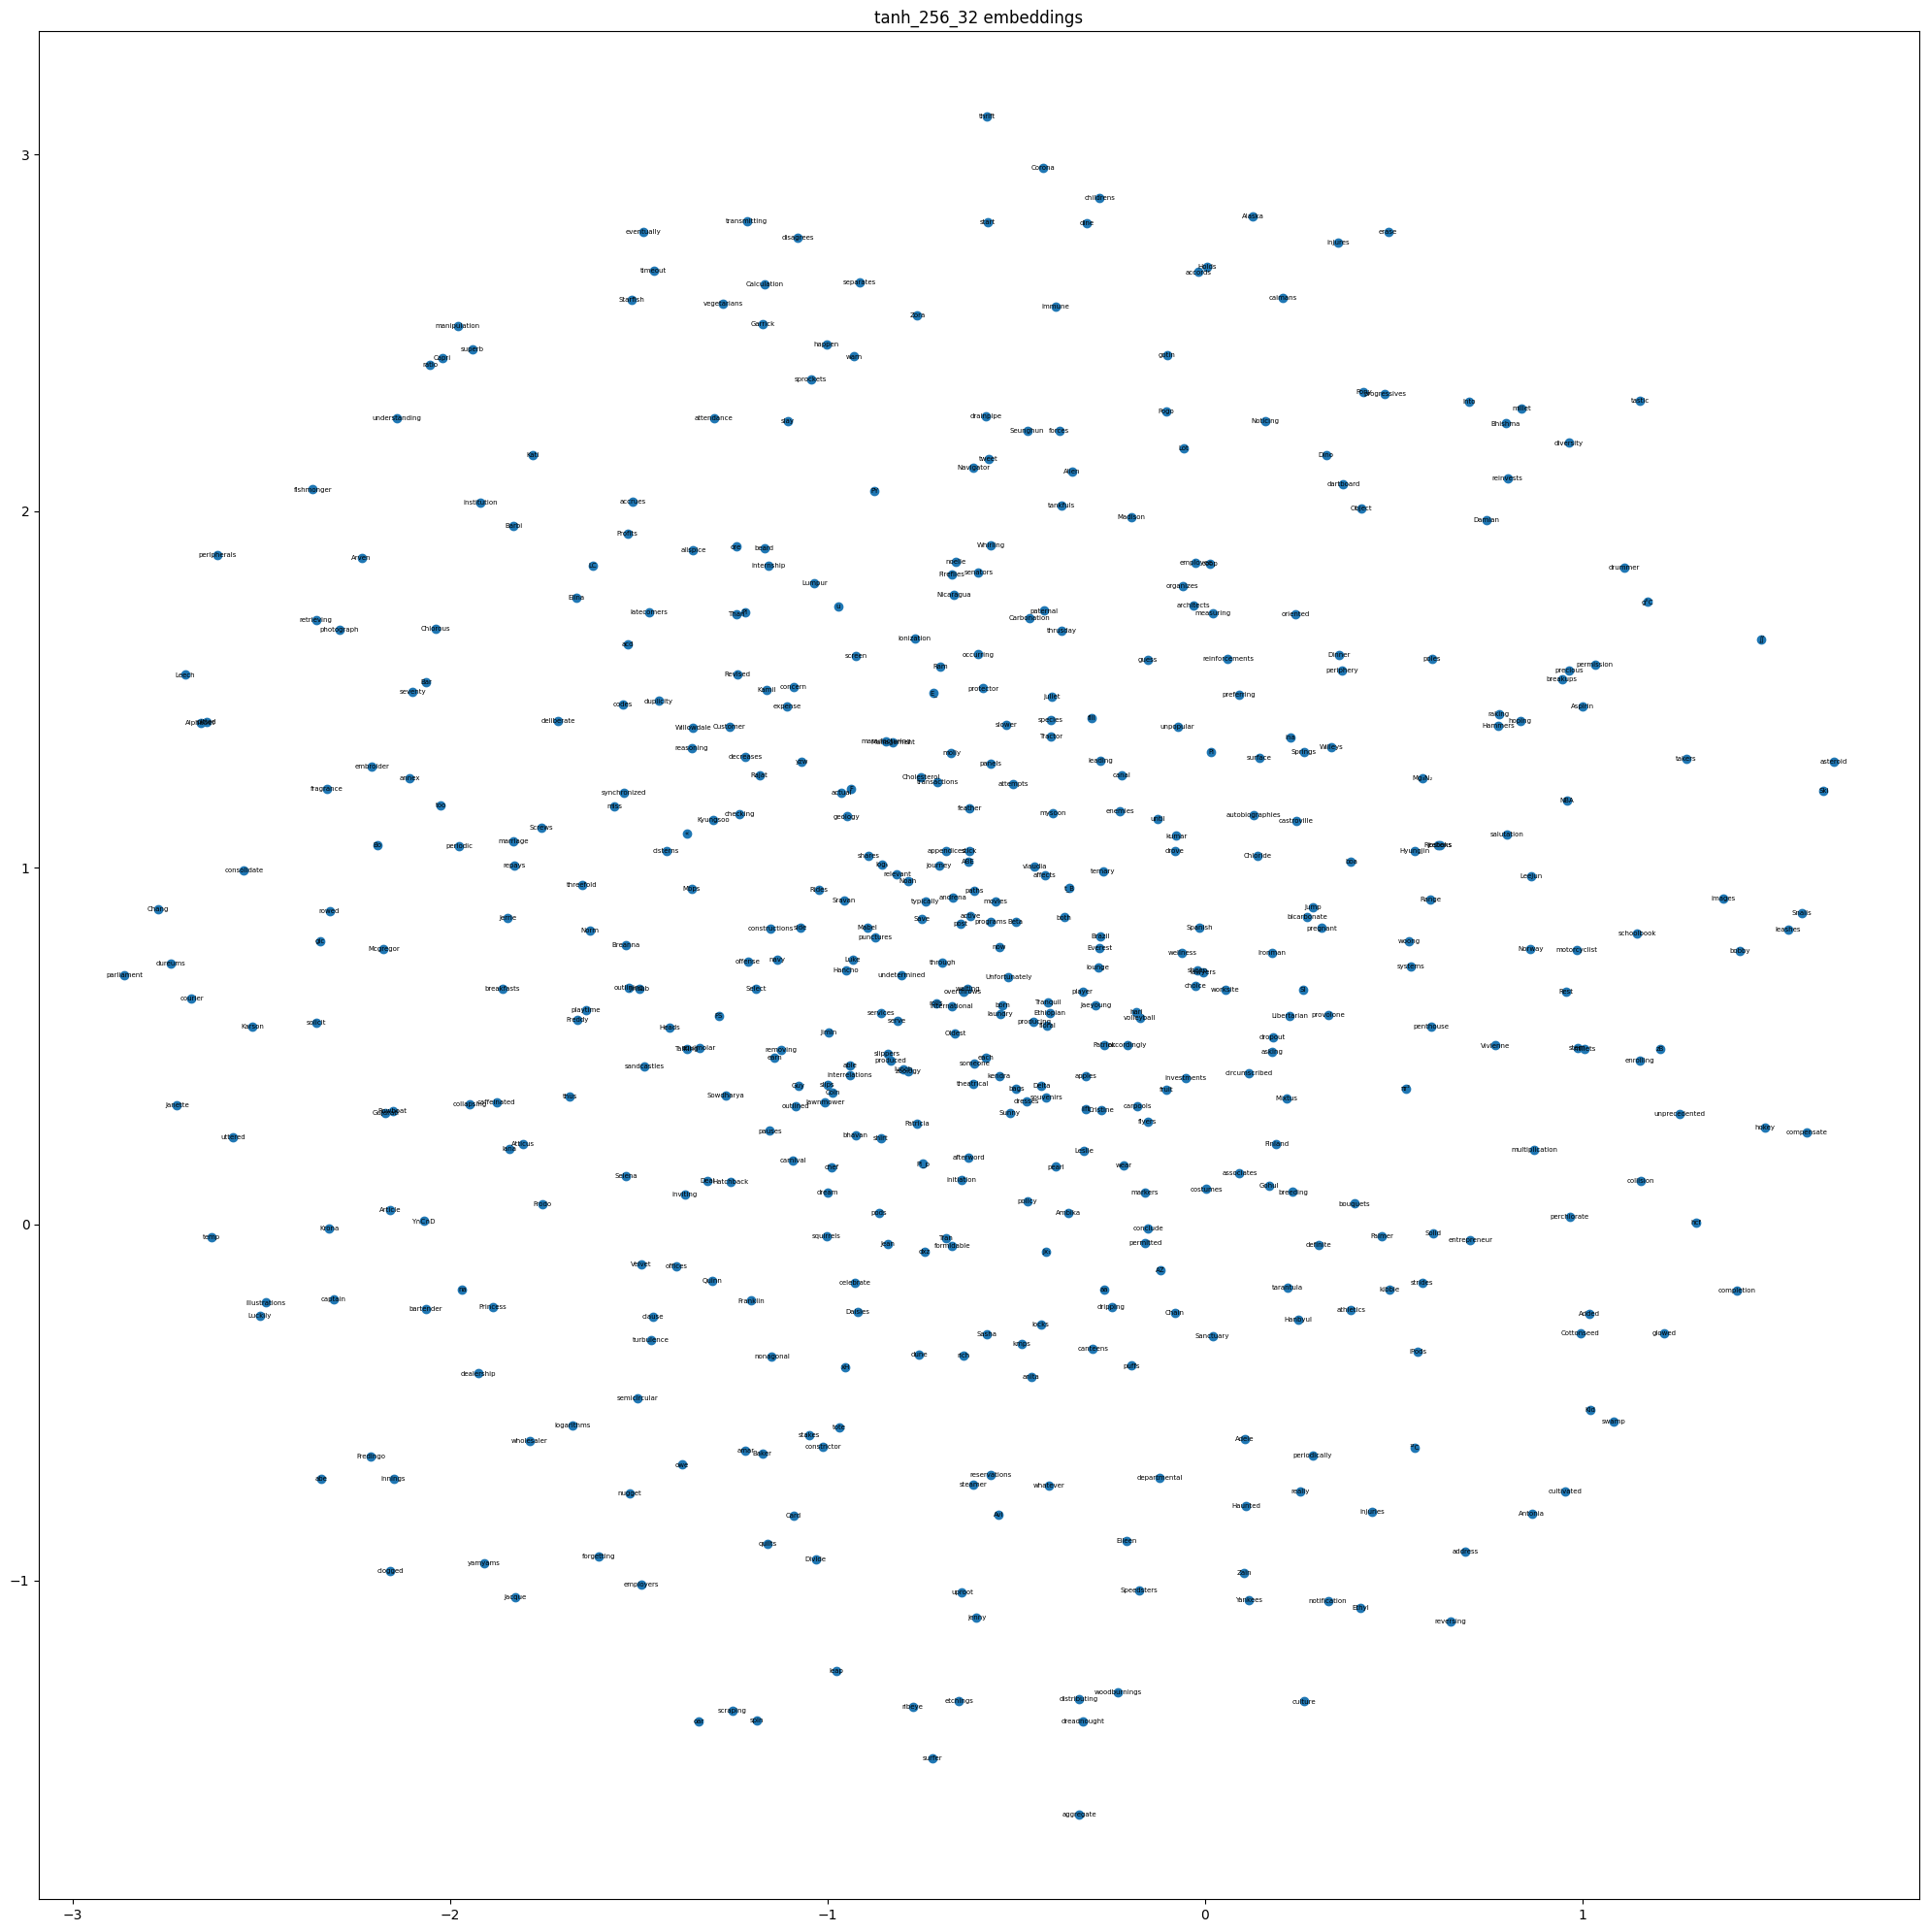

In [30]:
for i in models:
    emb = get_embeddings(models[i])
    # Randomly sample 1000 words
    idxs = np.random.choice(len(emb), 500, replace=False)
    emb = emb[idxs]
    itos_new = {i: itos[i] for i in idxs}
    plot_tsne_embeddings(i, emb, itos_new, path="", font=5, size=25, dpi=100)